In [1]:
from IPython.display import display, Image

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [3]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정 

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [8]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [9]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정

### 모델 훈련

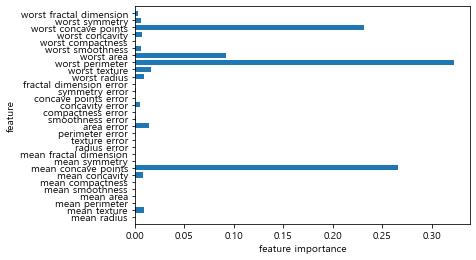

In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)

gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

### seaborn으로 시각화

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

<AxesSubplot:title={'center':'feature importances'}>

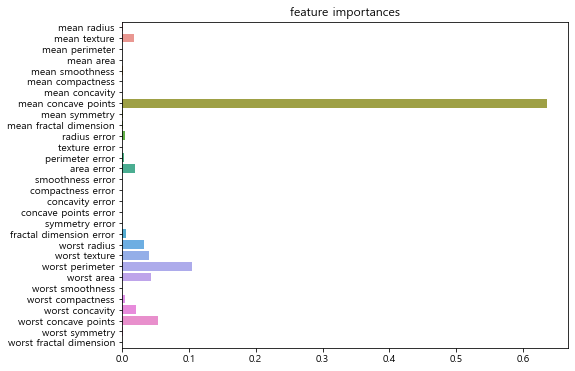

In [16]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)

### 3-2 실습 - 타이타닉 데이터 셋 그래디언트 부스팅 모델 구현하기

In [67]:
titanic = pd.read_csv('data/train.csv')
titanic.shape

(891, 12)

In [112]:
df = titanic.copy()

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

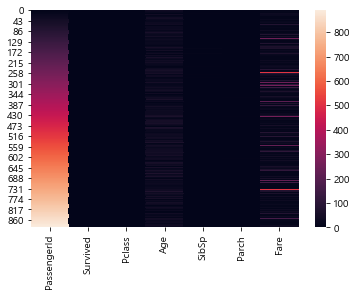

In [121]:
sns.heatmap(df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']])

In [126]:
sel = ['Pclass','SibSp','Parch','Fare']
X = df[sel]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [127]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.792
테스트 세트 정확도: 0.735


In [128]:
# 특성 결측치 처리
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [129]:
df['sex_num'] = df['Sex'].map({'male':1, 'female':2})

In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [131]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
F G63          1
E36            1
B78            1
C70            1
B4             1
Name: Cabin, Length: 147, dtype: int64

In [132]:
df['cabin_num'] = df['Cabin'].notnull().astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,cabin_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [133]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [134]:
df['Embarked'].isnull().sum()

2

In [135]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

In [136]:
df['embarked_num'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,cabin_num,embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  sex_num       891 non-null    int64  
 13  cabin_num     891 non-null    int32  
 14  embarked_num  891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(5)
memory usage: 101.1+ KB


In [138]:
type(df['Age'].median())

float

In [139]:
type(df['Age'].median)

method

In [140]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  sex_num       891 non-null    int64  
 13  cabin_num     891 non-null    int32  
 14  embarked_num  891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(5)
memory usage: 101.1+ KB


In [141]:
sel = ['Pclass','SibSp','Parch','Fare','Age','sex_num','cabin_num','embarked_num']
X = df[sel]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [142]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.901
테스트 세트 정확도: 0.843


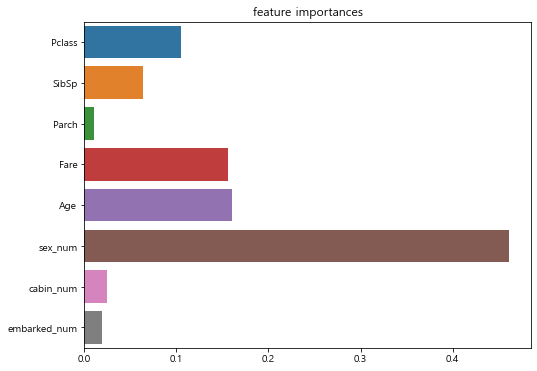

In [143]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=sel)

plt.figure(figsize=(8,6))
plt.title('feature importances')
_ = sns.barplot(x=importances, y=importances.index)

In [156]:
# 3-4 (추가) 정확도가 가장 높은 매개변수 찾기(lr_rate, max_depth, n_estimators) - 댓글
for d in range(1,5):
    for rate in [0.01, 0.05, 0.07, 0.09, 0.001, 0.005, 0.007]:
        for n in [10,100,1000]:
            gbrt = GradientBoostingClassifier(random_state=0, max_depth=d, learning_rate=rate, n_estimators=n)

            gbrt.fit(X_train, y_train)

            print(f'max_depth = {d}, learning_rate = {rate}, n_estimators = {n}')
            print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
            print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
            print()

max_depth = 1, learning_rate = 0.01, n_estimators = 10
훈련 세트 정확도: 0.614
테스트 세트 정확도: 0.623

max_depth = 1, learning_rate = 0.01, n_estimators = 100
훈련 세트 정확도: 0.789
테스트 세트 정확도: 0.780

max_depth = 1, learning_rate = 0.01, n_estimators = 1000
훈련 세트 정확도: 0.817
테스트 세트 정확도: 0.785

max_depth = 1, learning_rate = 0.05, n_estimators = 10
훈련 세트 정확도: 0.789
테스트 세트 정확도: 0.780

max_depth = 1, learning_rate = 0.05, n_estimators = 100
훈련 세트 정확도: 0.810
테스트 세트 정확도: 0.789

max_depth = 1, learning_rate = 0.05, n_estimators = 1000
훈련 세트 정확도: 0.835
테스트 세트 정확도: 0.816

max_depth = 1, learning_rate = 0.07, n_estimators = 10
훈련 세트 정확도: 0.789
테스트 세트 정확도: 0.780

max_depth = 1, learning_rate = 0.07, n_estimators = 100
훈련 세트 정확도: 0.813
테스트 세트 정확도: 0.789

max_depth = 1, learning_rate = 0.07, n_estimators = 1000
훈련 세트 정확도: 0.847
테스트 세트 정확도: 0.812

max_depth = 1, learning_rate = 0.09, n_estimators = 10
훈련 세트 정확도: 0.789
테스트 세트 정확도: 0.780

max_depth = 1, learning_rate = 0.09, n_estimators = 100
훈련 세트 정확도: 0.817
테스트 세트 정

In [162]:
# 3-5 (추가) 교차 검증을 통해 모델 비교해보기

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
pred = gbrt.predict(X_test)

In [160]:
confusion = confusion_matrix(y_test, pred)
print(confusion)

[[128  11]
 [ 25  59]]


In [166]:
TN = confusion[0][0]
print(TN, type(TN))

128 <class 'numpy.int64'>


In [167]:
FP = confusion[0][1]
print(FP, type(FP))

11 <class 'numpy.int64'>


In [168]:
FN = confusion[1][0]
print(FN, type(FN))

25 <class 'numpy.int64'>


In [169]:
TP = confusion[1][1]
print(FN, type(FN))

25 <class 'numpy.int64'>


In [170]:
accuracy = (TN+TP) / (TN+TP+FN+FP)
precision = TP / (TP+FP)
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
FPrate = FP / (TN+FP)

In [171]:
print(f'정확도 = {accuracy}')
print(f'정밀도 = {precision}')
print(f'민감도 = {sensitivity}')
print(f'특이도 = {specificity}')
print(f'FPrate = {FPrate}')

정확도 = 0.8385650224215246
정밀도 = 0.8428571428571429
민감도 = 0.7023809523809523
특이도 = 0.920863309352518
FPrate = 0.07913669064748201
